prepare the Dataset and visualize it 

In [3]:
import torch 
from torch import nn
import matplotlib.pyplot as plt 
import random
import pandas as pd 
import numpy as np  


In [4]:
torch.__version__
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [158]:
weight = 2
bias = 4
print (weight, bias)

X = torch.arange(-2,2,0.000002 , dtype=torch.float32 , device=device) 
Y = weight * X + bias 

X.shape , Y.shape


2 4


(torch.Size([2000000]), torch.Size([2000000]))

In [159]:
training_size = int(len(X)*0.8)                             # 80% of the data is used for training , 20% for testing
print(training_size)
x_train , x_test = X[:training_size] , X[training_size:]
y_train , y_test = Y[:training_size] , Y[training_size:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape    

1600000


(torch.Size([1600000]),
 torch.Size([400000]),
 torch.Size([1600000]),
 torch.Size([400000]))

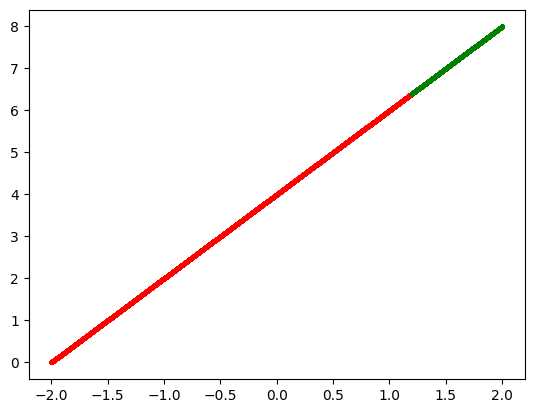

In [160]:
plt.scatter(x_train, y_train, c='red' , s=4 , label='Training Data')
plt.scatter(x_test, y_test, c='green' , s=4 , label='Testing Data')
# plt.bar(x_train, y_train, width=0.0000002, color='red', alpha=0.5)
plt.show()

Build Model and train it 

In [207]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.weight = nn.Parameter(torch.randn(1, device=device , dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, device=device , dtype=torch.float32) , requires_grad=True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:     
        return self.weight * x + self.bias
        


In [208]:
torch.manual_seed(42)
model = Linear().to(device)
model.state_dict()


OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [209]:
with torch.inference_mode():
    y_pred = model(x_train)

y_pred.shape

torch.Size([1600000])

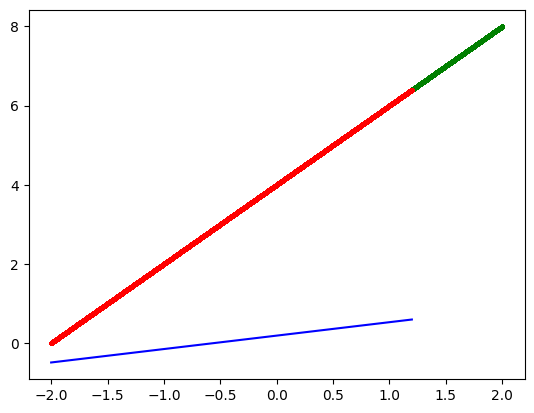

In [217]:
x_train_numpy = x_train.cpu().numpy()
y_train_numpy = y_train.cpu().numpy()
y_pred_numpy = y_pred.cpu().detach().numpy()
x_test_numpy = x_test.cpu().numpy()
y_test_numpy = y_test.cpu().numpy() 

plt.scatter(x_test_numpy, y_test_numpy, c='green', s=4, label='Testing Data')
plt.scatter(x_train_numpy, y_train_numpy, c='red', s=4, label='Training Data')
plt.plot(x_train_numpy, y_pred_numpy, c='blue', label='Model Prediction')

In [211]:
loss_fn = nn.MSELoss()

In [212]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [234]:
epochs = 1000
losses = []
train = []
epochs_count= []

y_pred = model(x_train)

for epoch in range(epochs):
    #training mode 
    model.train()
    # forward pass
    y_pred = model(x_train)
    # loss calculation
    loss = loss_fn(y_pred , y_train)
    # reset the gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    # update the weights
    optimizer.step()

    
    # testing
    # evaluation mode
    model.eval()
    with torch.inference_mode():
        y_pred_test = model(x_test)
        loss_test = loss_fn(y_pred_test, y_test)
        
    if epoch % 10 == 0:
        losses.append(loss_test.cpu().detach().numpy())
        train.append(loss.cpu().detach().numpy())
        epochs_count.append(epoch)
        
        print(f'Epoch {epoch} , Loss {loss}')
        
   


Epoch 0 , Loss 0.00013554291217587888
Epoch 10 , Loss 0.0001322911266470328
Epoch 20 , Loss 0.00012912211241200566
Epoch 30 , Loss 0.0001260209537576884
Epoch 40 , Loss 0.0001229983172379434
Epoch 50 , Loss 0.00012005121243419126
Epoch 60 , Loss 0.00011716674634953961
Epoch 70 , Loss 0.00011436099885031581
Epoch 80 , Loss 0.00011161696602357551
Epoch 90 , Loss 0.0001089377619791776
Epoch 100 , Loss 0.0001063263407559134
Epoch 110 , Loss 0.00010377060243627056
Epoch 120 , Loss 0.00010128700523637235
Epoch 130 , Loss 9.88529936876148e-05
Epoch 140 , Loss 9.648344712331891e-05
Epoch 150 , Loss 9.416941611561924e-05
Epoch 160 , Loss 9.190989658236504e-05
Epoch 170 , Loss 8.970640919869766e-05
Epoch 180 , Loss 8.755175804253668e-05
Epoch 190 , Loss 8.545611490262672e-05
Epoch 200 , Loss 8.340257772943005e-05
Epoch 210 , Loss 8.140487625496462e-05
Epoch 220 , Loss 7.944771641632542e-05
Epoch 230 , Loss 7.754681428195909e-05
Epoch 240 , Loss 7.568257569801062e-05
Epoch 250 , Loss 7.3872673965

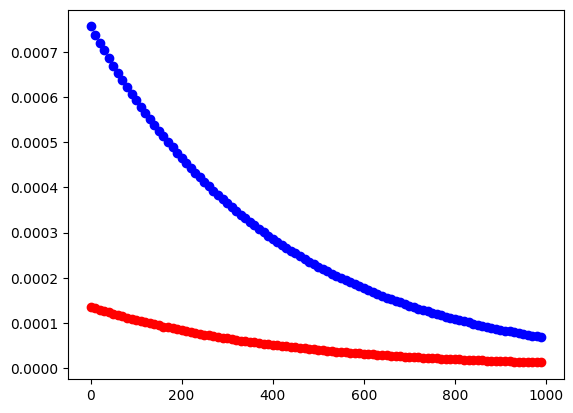

In [235]:

plt.figure()
plt.scatter(epochs_count,  train , c='red', label='Training Loss')
plt.scatter(epochs_count, losses, c='blue', label='Testing Loss')
plt.show()


In [236]:
ds = torch.arange(1,10, 1)
tensor_ds = torch.tensor(ds)

predict = model(tensor_ds).cpu().detach().numpy()
print (ds , predict)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]) [ 5.9937196  7.9906063  9.987493  11.98438   13.981266  15.978152
 17.97504   19.971926  21.968813 ]


C:\Users\Paxerahealth\AppData\Local\Temp\ipykernel_22828\1203751077.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_ds = torch.tensor(ds)


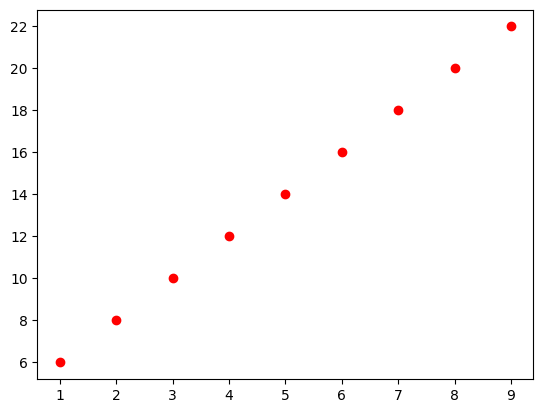

OrderedDict([('weight', tensor([1.9969])), ('bias', tensor([3.9968]))])

In [237]:
plt.figure(1)
plt.scatter(ds, predict, c='red', label='Prediction')

plt.show()
model.state_dict()


In [241]:
a = [12,15,85,66,45,78,96,45,78]
b = [90,22,50,45,78,96,45,78,12]

mean_a = np.mean(a)
mean_b = np.mean(b)

sd_a = np.std(a)
sd_b = np.std(b)

cov_a  = np.cov(a)
cov_b = np.cov(b)

cv_a = sd_a/mean_a
cv_b = sd_b/mean_b


print (mean_a, mean_b, sd_a, sd_b, cv_a, cv_b , cov_a, cov_b)

57.77777777777778 57.333333333333336 28.55706870180317 28.043616821737608 0.4942569583004395 0.489132851541935 917.4444444444445 884.75


: 